<a href="https://colab.research.google.com/github/engmohamedsalah/AIMaster/blob/master/Building_an_AI_based_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an AI-based Application

# Task 1:

Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:
import matplotlib.pyplot as plt
df_super_store = pd.read_csv('sample-superstore 2023 T3.csv')

In [79]:
df_super_store.sample(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3894,5660,CA-2016-145261,18/12/2016,21/12/2016,First Class,AH-10120,Adrian Hane,Home Office,United States,Salem,...,97301,West,OFF-LA-10000407,Office Supplies,Labels,Avery White Multi-Purpose Labels,15.936,4,0.2,5.1792
6720,1672,CA-2016-107615,22/03/2016,25/03/2016,First Class,RB-19645,Robert Barroso,Corporate,United States,North Las Vegas,...,89031,West,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,58.580,2,0.0,19.3314
988,8662,CA-2015-131856,05/12/2015,17/05/2015,Standard Class,JG-15160,James Galang,Consumer,United States,Houston,...,77041,Central,FUR-FU-10000175,Furniture,Furnishings,DAX Wood Document Frame.,21.968,4,0.6,-15.9268
6606,3780,CA-2017-118521,16/02/2017,20/02/2017,Standard Class,LF-17185,Luke Foster,Consumer,United States,New York City,...,10035,East,OFF-PA-10003465,Office Supplies,Paper,Xerox 1912,37.940,2,0.0,18.2112
2459,9617,CA-2016-140256,22/08/2016,29/08/2016,Standard Class,PW-19030,Pauline Webber,Corporate,United States,Los Angeles,...,90049,West,OFF-AR-10002255,Office Supplies,Art,Newell 346,5.760,2,0.0,1.6704


In [80]:
df_super_store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [81]:
# Discover Segment Values
df_super_store.groupby('Segment').count()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,,,,,,,,,,
%,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Consumer,5189,5189,5188,5187,5187,5189,5188,5188,5187,5185,5187,5186,5189,5188,5186,5188,5188,5187,5187,5181
Corporate,3019,3019,3019,3019,3017,3019,3017,3019,3019,3019,3019,3019,3019,3019,3019,3018,3019,3016,3018,3018
Home Office,1782,1781,1781,1781,1782,1782,1782,1780,1782,1782,1782,1782,1782,1781,1781,1781,1782,1782,1782,1780



from the data I noticed that there is record with value not correct and it is only one record so I will remove it
the row as following

Segment = '%' looks like not correct values so I will remove it

In [82]:
df_super_store = df_super_store[df_super_store['Segment']!= '%']

In [83]:
df_super_store.groupby('Segment').count()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Segment,,,,,,,,,,,,,,,,,,,,
Consumer,5189,5189,5188,5187,5187,5189,5188,5188,5187,5185,5187,5186,5189,5188,5186,5188,5188,5187,5187,5181
Corporate,3019,3019,3019,3019,3017,3019,3017,3019,3019,3019,3019,3019,3019,3019,3019,3018,3019,3016,3018,3018
Home Office,1782,1781,1781,1781,1782,1782,1782,1780,1782,1782,1782,1782,1782,1781,1781,1781,1782,1782,1782,1780


**Summary**

The dataset appears to contain information related to orders, with various

1.   attributes for each row such as Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, and more. It seems to be a record of sales transactions, possibly for a retail or e-commerce company, as it includes details like product categories, sub-categories, product names, sales amounts, quantities, discounts, and profits. The dataset likely represents a snapshot of sales data, including information about customers, their orders, and the products they purchased, all within the context of different locations and segments.
2.   the data looks like it is a kind of purchasing order and it focuses on the profit where the purchase order happened in different ***segment*** which may use be used to  category for customer segmentation as Class A, B, or C and so one


3.   from the first impression the significant feature is `'Ship Mode', 'Segment', 'Quantity', 'Discount', And 'Profit'`. So maybe this data will used in LM to train a model either to classify a customer or predict the profit the following exploration will discover more insights

#Task 2:

Process the dataset's variables and conduct exploratory data analysis. Explore the dataset as much as you can, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

###2.1 Descriptive statistics:

Let's try to explor the data

In [84]:
df_super_store.describe()
#df_super_store.describe(include='all')



,Row ID,Sales,Discount
count,9993.000000,9992.000000,9990.000000
mean,4997.831782,229.846798,0.156125
std,2885.117330,623.304898,0.206338
min,1.000000,0.444000,0.000000
25%,2500.000000,17.272000,0.000000
50%,4998.000000,54.432000,0.200000
75%,7496.000000,209.940000,0.200000
max,9994.000000,22638.480000,0.800000


In [85]:
df_super_store.isnull().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [86]:
df_super_store.isna().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

#2.5 Handling missing values in the dataset: Identify methods for cleaning the dataset.
I decided to remove all nulls due to the number of nulls compared to the total number of records being so small.
in other situations, I could use it to fill null with Mean median, mode, or interpolation. the biggest number of null values in **"Profit"** 11 records that represent 11/9993 ~ 0.11 %, not even 1% so I can remove null and data will not be affected


In [87]:
df_super_store.dropna(inplace=True)

In [88]:
df_super_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [89]:
df_super_store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Remove unimportant columns
some columns is not important and no need to use it in Building the LM
for example 'Row ID'
also it is possible that remove either customer id, or customer name because each of them represent the same  
for now I will remove RowID and later I will decide to remove more column or merge column customer name and id

In [90]:
del df_super_store['Row ID']

5

In [91]:
df_super_store.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity          object
Discount         float64
Profit            object
dtype: object

##discover the values that expected to be number like Quantity, Sales, Profit

### Convert sales to float from object type as it look like numeric

### Convert Quantity to numberic

In [92]:
df_super_store['Quantity'].unique()


array(['5', '4', '8', 'Two', '6', '7', '3', 'Seven', '9', '12', '2',
       'ten', '10', '7?', '1', '14', '13', '11'], dtype=object)

In [93]:
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Two', 2)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Seven', 7)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('ten', 10)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('7?', 7)


df_super_store['Quantity'] = pd.to_numeric(df_super_store['Quantity'], errors='raise')


### Convert Profit to numberic

create method to check the values of a column in dataframe that not numberic

In [94]:
def check_non_numeric_values(dataframe, column_name):
    non_numeric_values = dataframe.loc[~dataframe[column_name].astype(str).str.match(r'^-?[0-9.]+$', na=False), column_name]
    return non_numeric_values


In [95]:
df_super_store['Quantity'].unique()


array([ 5,  4,  8,  2,  6,  7,  3,  9, 12, 10,  1, 14, 13, 11])

In [96]:
df_super_store['Profit'].unique()


array(['-6599.978', '-3839.9904', '-3701.8928', ..., '5039.9856',
       '6719.9808', '8399.976'], dtype=object)

Check which values are not numeric in Profit

In [97]:
print(check_non_numeric_values(df_super_store, 'Profit'))

5    "-2639.9912"
Name: Profit, dtype: object


In [98]:
#remove the extra double-quote and covert all values to numberic

df_super_store['Profit'] = pd.to_numeric(df_super_store['Profit'].str.strip('"').str.replace('"', ''), errors='raise')


# Check the data types after conversion

In [99]:
print(df_super_store.dtypes)

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


# check the NA values and clean it

In [100]:
df_super_store.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# 2.2 Outlier treatment: Identify abnormal or problematic values and apply methods to treat them.

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def clean_outliers(df, column_name):
    # Display the original number of rows
    original_rows = len(df)
    print(f"Number of rows before outlier removal: {original_rows}")

    # Create a boxplot to visualize the data
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column_name])
    plt.title("Boxplot of the Original Dataset")
    plt.show()

    # Identify and treat outliers using the boxplot
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Remove outliers
    df_cleaned = df[~((df[column_name] < lower_bound) | (df[column_name] > upper_bound))]

    # Reset the index of df_cleaned
    df_cleaned = df_cleaned.reset_index(drop=True)

    # Display the number of rows after outlier removal
    cleaned_rows = len(df_cleaned)
    print(f"Number of rows after outlier removal: {cleaned_rows}")

    # Calculate and display the percentage of removal
    percentage_removed = ((original_rows - cleaned_rows) / original_rows) * 100
    print(f"Percentage of removal: {percentage_removed:.2f}%")

    # Create a boxplot of the dataset after outlier treatment
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_cleaned[column_name])
    plt.title("Boxplot After Outlier Treatment")
    plt.show()

Number of rows before outlier removal: 9938


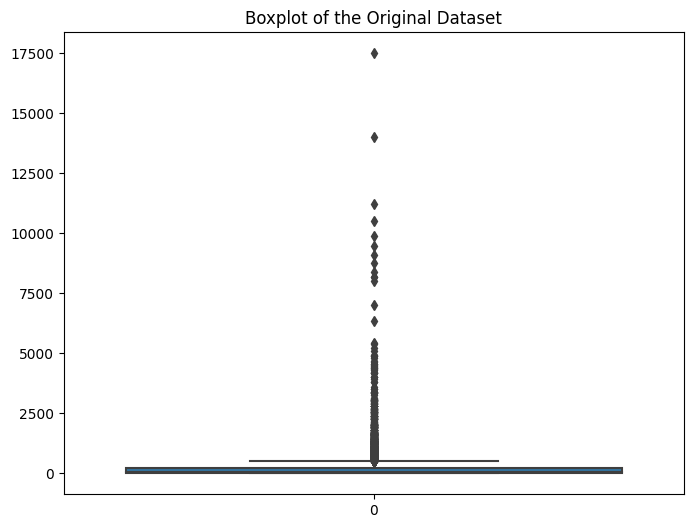

Number of rows after outlier removal: 8781
Percentage of removal: 11.64%


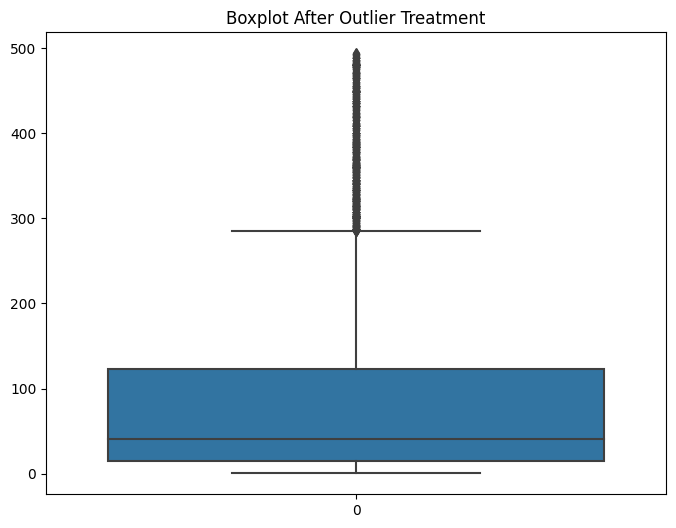

In [102]:
clean_outliers(df_super_store, 'Sales')


Number of rows before outlier removal: 9938


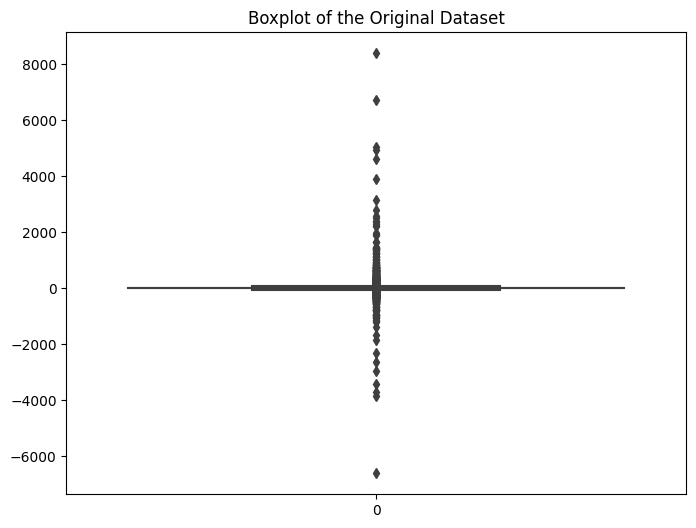

Number of rows after outlier removal: 8099
Percentage of removal: 18.50%


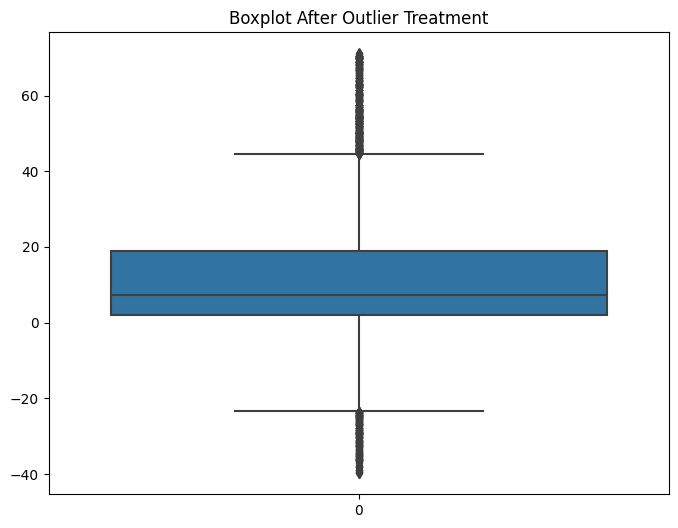

In [103]:
clean_outliers(df_super_store, 'Profit')


Number of rows before outlier removal: 9938


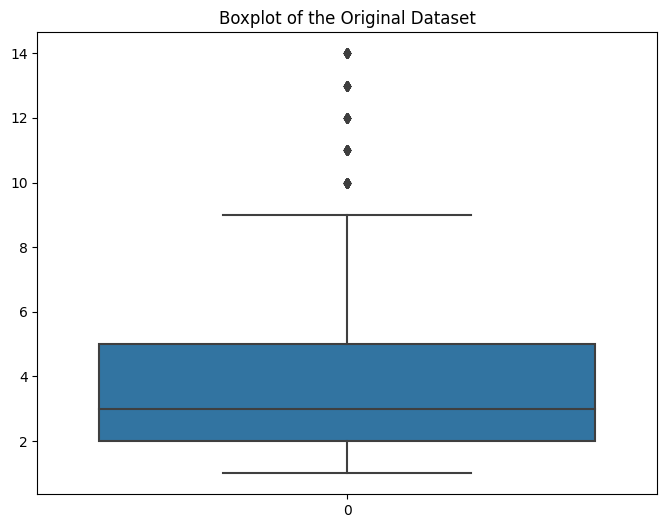

Number of rows after outlier removal: 9769
Percentage of removal: 1.70%


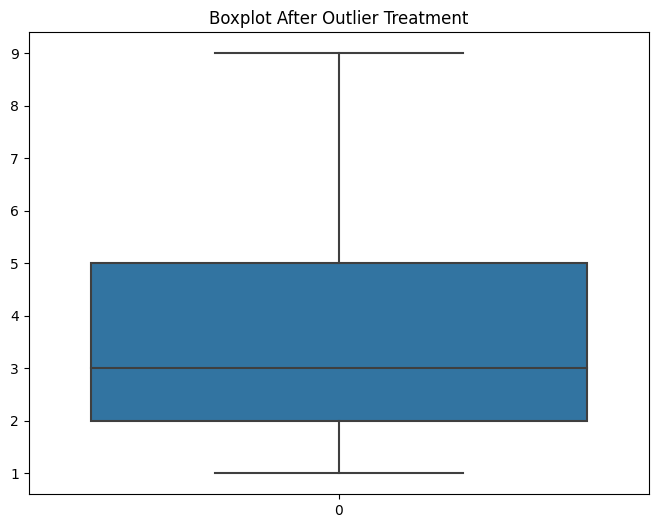

In [104]:
clean_outliers(df_super_store, 'Quantity')

Number of rows before outlier removal: 9938


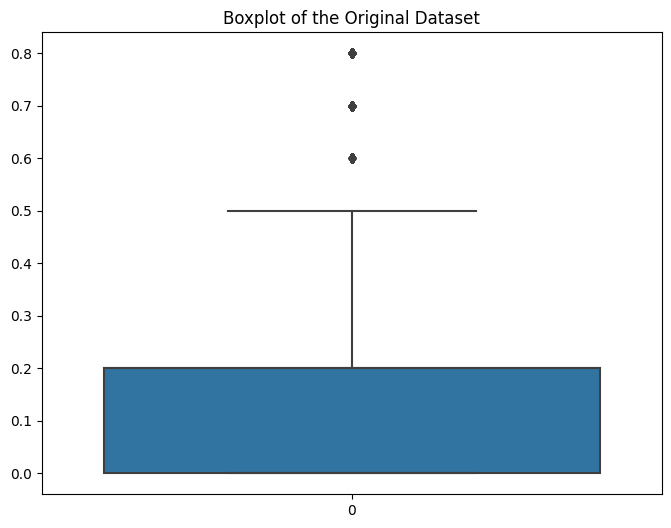

Number of rows after outlier removal: 9099
Percentage of removal: 8.44%


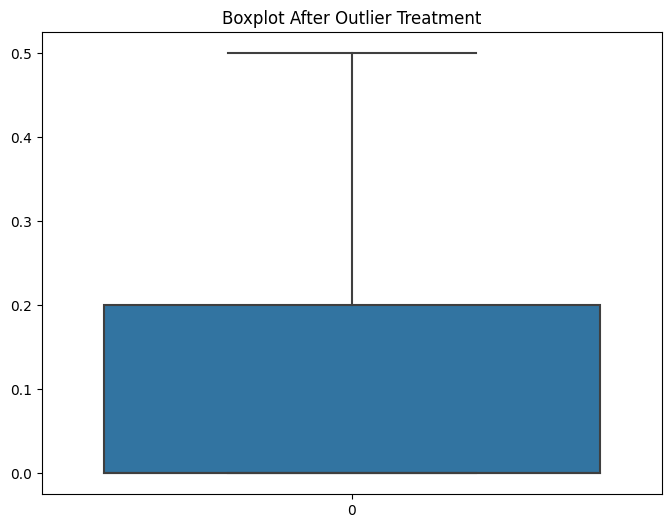

In [105]:
clean_outliers(df_super_store, 'Discount')

#2.6 Correlation: Describe features that are related and the nature of that relationship.

In [106]:
df_super_store.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3818,CA-2014-133270,06/06/2014,06/09/2014,First Class,BM-11785,Bryan Mills,Consumer,United States,Rochester,New York,14609,East,OFF-AR-10002656,Office Supplies,Art,Sanford Liquid Accent Highlighters,13.360,2,0.0,4.9432
6367,CA-2017-118773,02/09/2017,14/02/2017,Standard Class,TP-21415,Tom Prescott,Consumer,United States,Houston,Texas,77070,Central,TEC-AC-10002402,Technology,Accessories,Razer Kraken PRO Over Ear PC and Music Headset,127.984,2,0.2,15.9980
1679,CA-2016-137239,22/08/2016,28/08/2016,Standard Class,CR-12730,Craig Reiter,Consumer,United States,Columbus,Ohio,43229,East,OFF-BI-10002827,Office Supplies,Binders,Avery Durable Poly Binders,3.318,2,0.7,-2.6544
5181,CA-2017-156951,10/01/2017,10/08/2017,Standard Class,EB-13840,Ellis Ballard,Corporate,United States,Seattle,Washington,98105,West,OFF-PA-10004451,Office Supplies,Paper,Xerox 222,19.440,3,0.0,9.3312
8467,CA-2014-142048,22/06/2014,25/06/2014,First Class,JE-15745,Joel Eaton,Consumer,United States,Louisville,Colorado,80027,West,TEC-AC-10004114,Technology,Accessories,KeyTronic 6101 Series - Keyboard - Black,196.752,6,0.2,56.5662


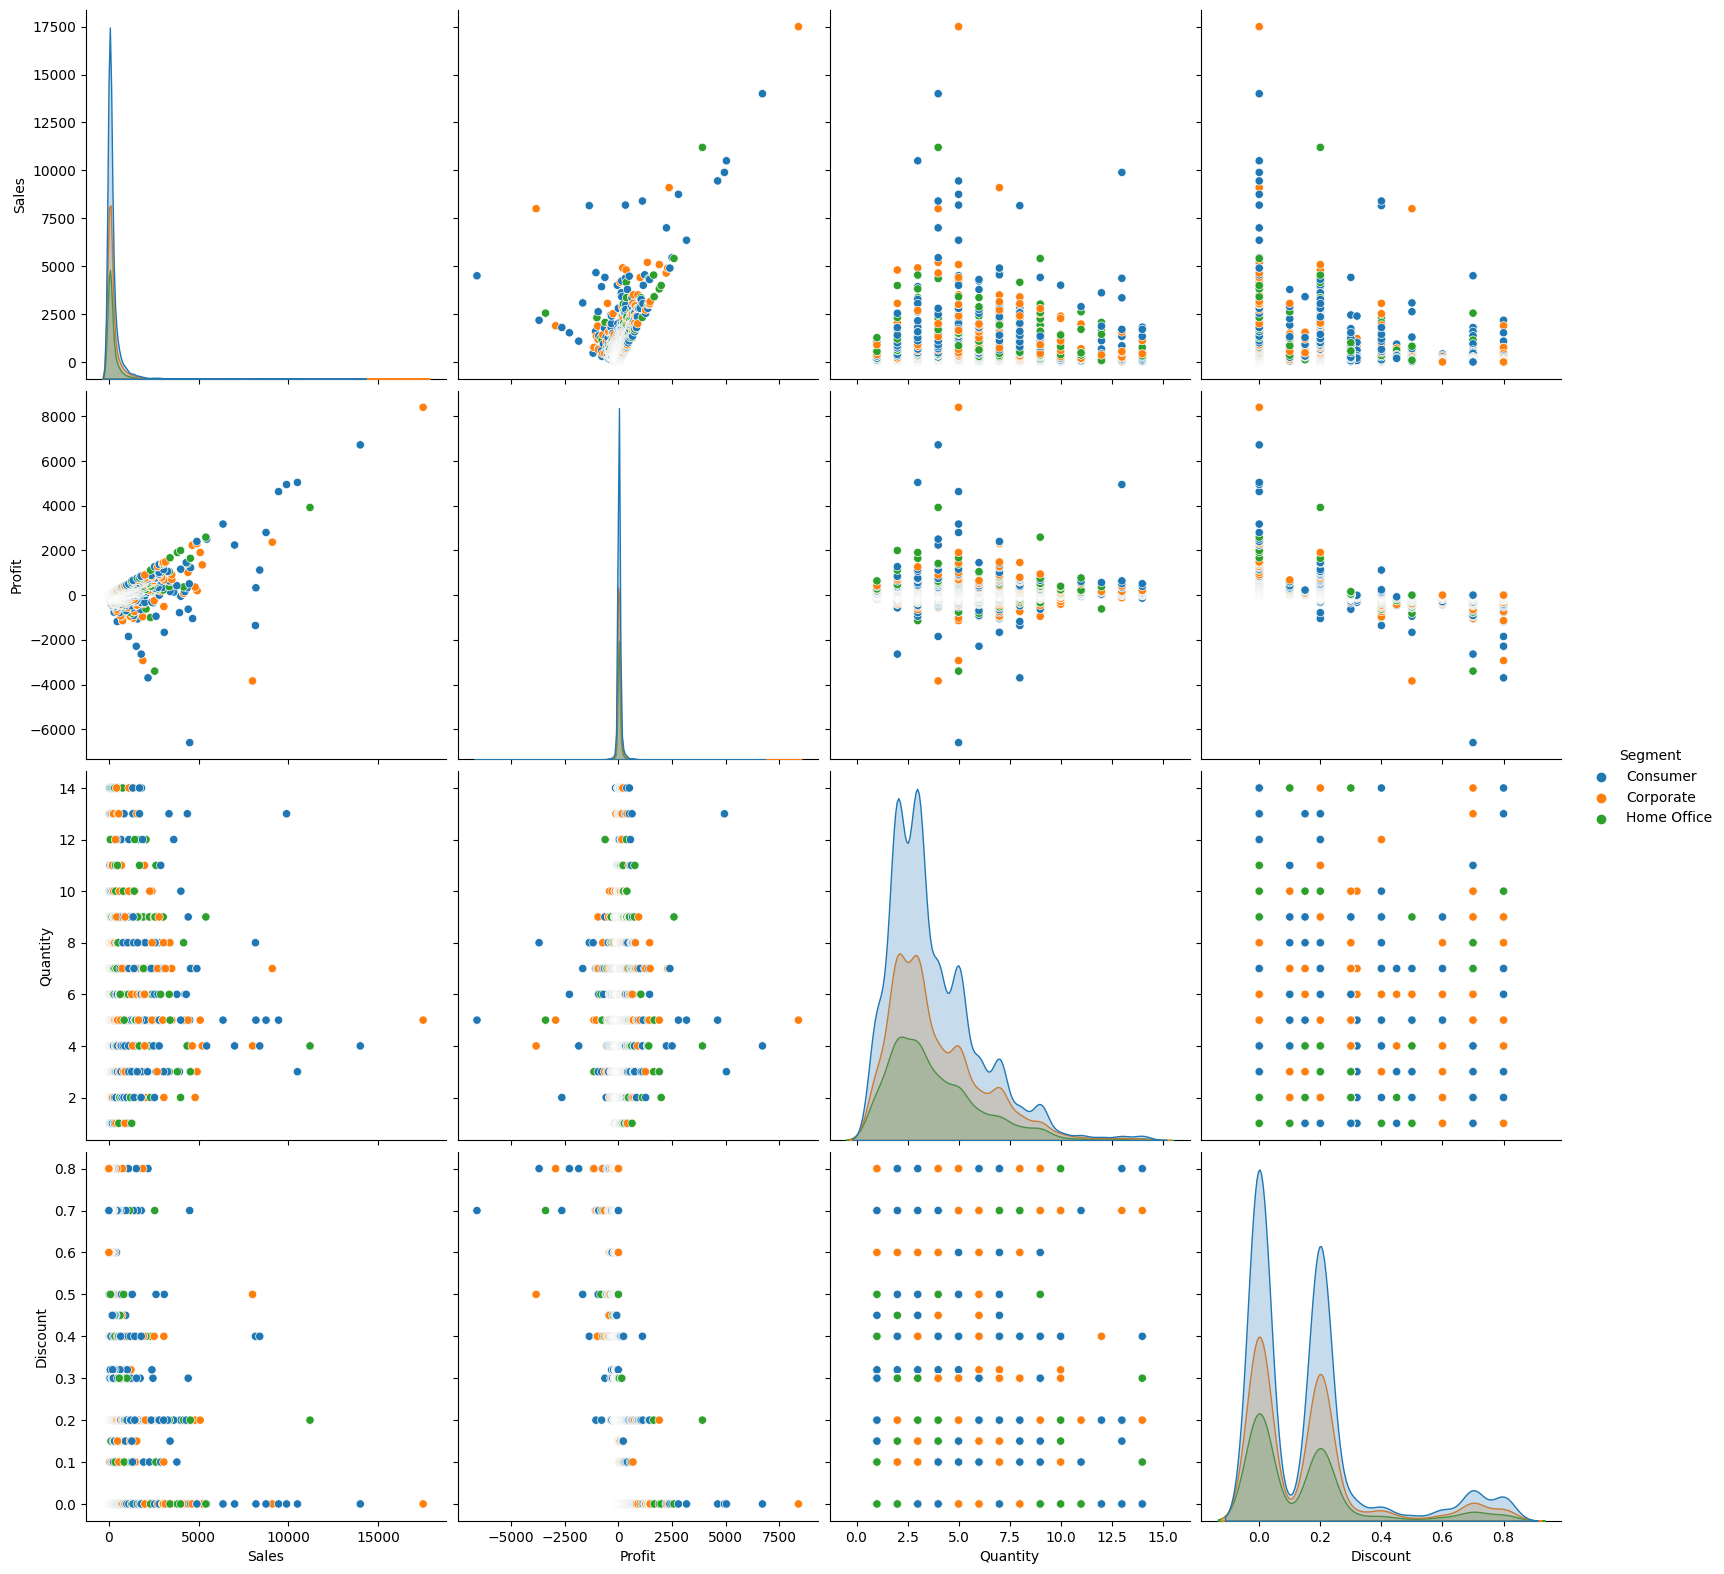

In [108]:
sns.pairplot(df_super_store, hue='Segment', height=4, vars=['Sales', 'Profit','Quantity' ,'Discount'])

In [109]:
correlation_matrix = df_super_store.corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.207973 -0.040803  0.566278
Quantity  0.207973  1.000000  0.006355  0.073940
Discount -0.040803  0.006355  1.000000 -0.211101
Profit    0.566278  0.073940 -0.211101  1.000000


<ipython-input-109-aa93160ee947>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

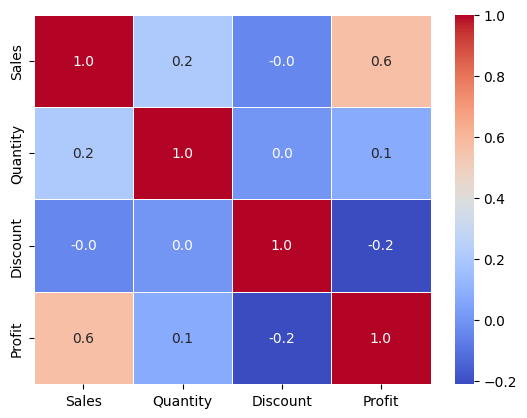

In [110]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)


*there is medium correlation between sales and profit 0.6*

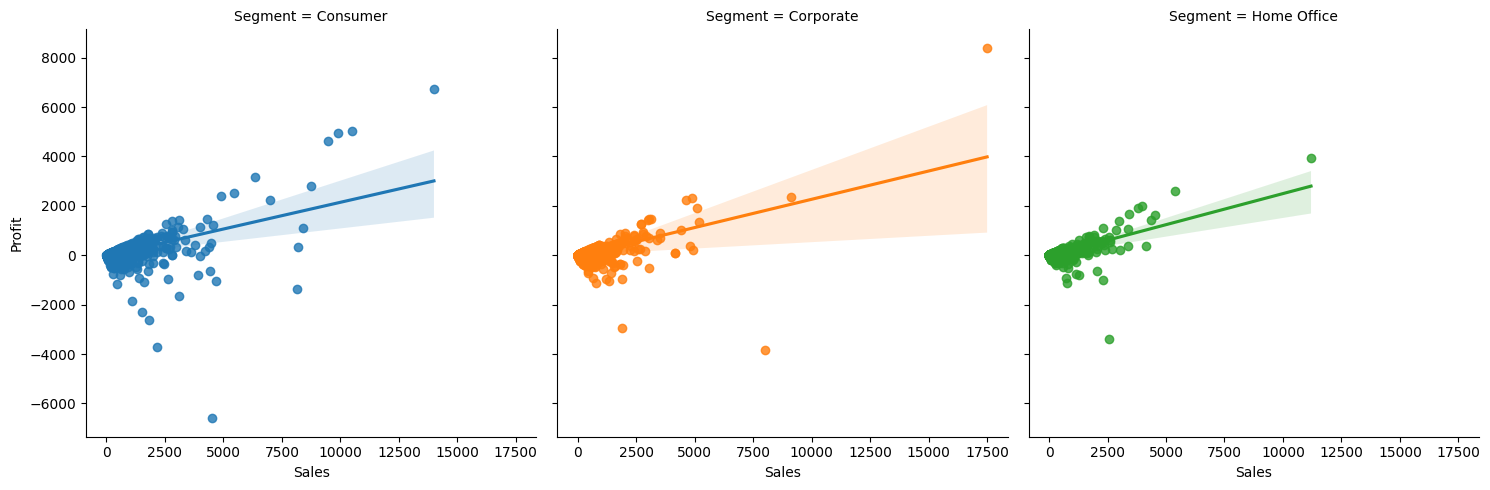

In [112]:
sns.lmplot(data=df_super_store, hue='Segment', x='Sales', y='Profit', col='Segment', fit_reg=True, col_wrap=3)
plt.show()

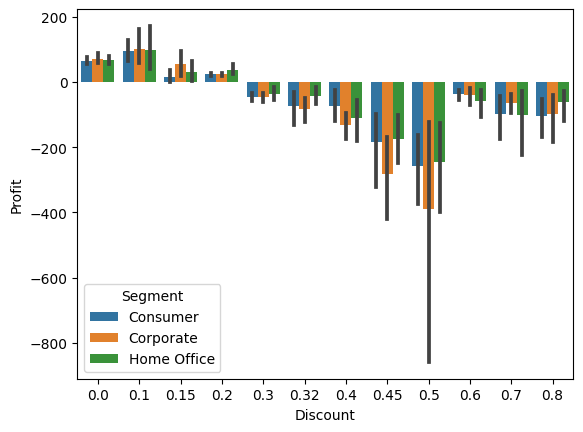

In [118]:
# check also the relation between the discount and profit
#It make sense when the discount increase the profit decrease

sns.barplot(data=df_super_store, hue='Segment', x='Discount', y='Profit')
plt.show()

In [121]:
# check also the relation between the Sales and Quantity
#It make sense when the discount increase the profit decrease

sns.barplot(data=df_super_store, hue='Segment', x='Sales', y='Quantity')
plt.show()

KeyboardInterrupt: ignored

It look like there are some outliter let's study them by boxplot

array([[<Axes: title={'center': 'Discount'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Profit'}, xlabel='[Segment]'>],
       [<Axes: title={'center': 'Quantity'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Sales'}, xlabel='[Segment]'>]],
      dtype=object)

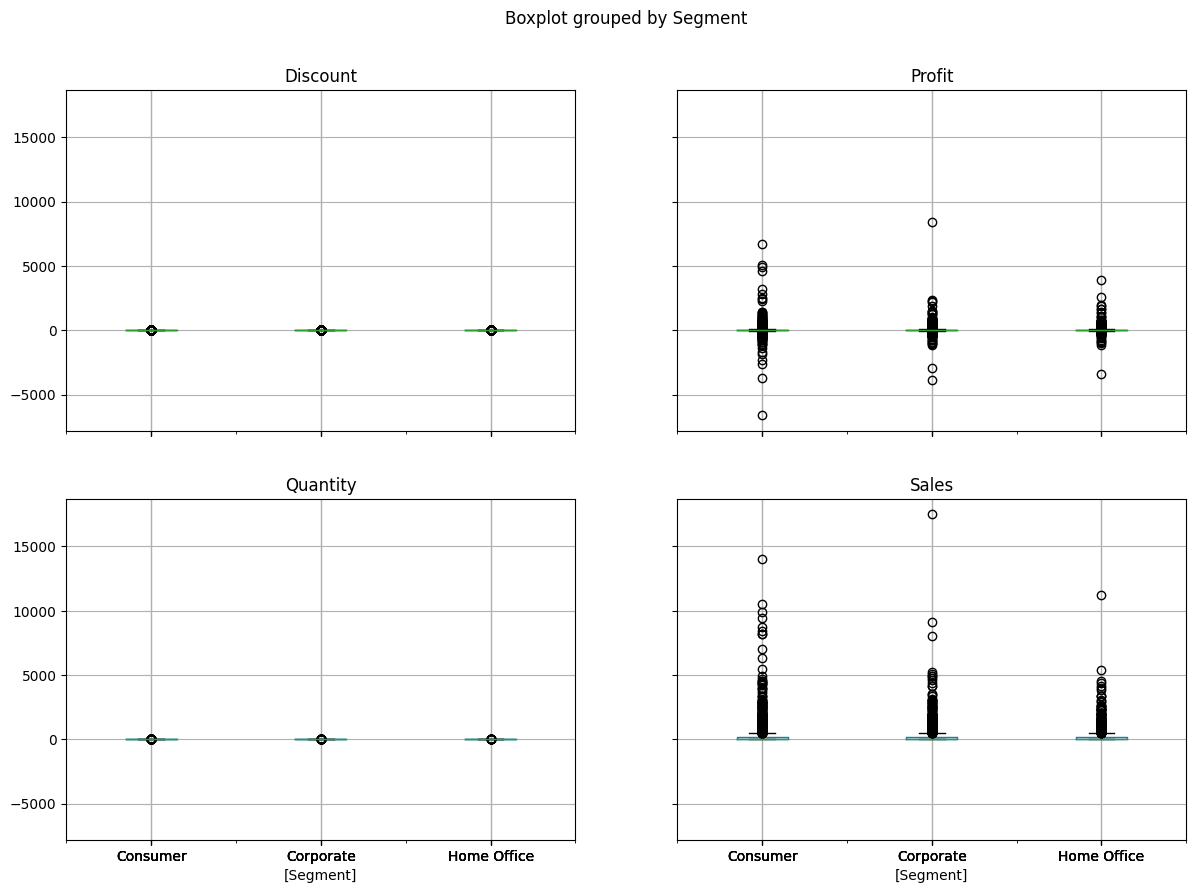

In [32]:
df_super_store.boxplot(by='Segment', figsize=(14,10))

# 2.4 Grouping of data: Demonstrate data aggregations or frequency distributions to summarise analysis.

1.   Group by Segment

*italicized text*

In [33]:
# Group by Segment
#group by segement to understand the classes of the customer
#the important of the segment is to understand the customer classes

result = df_super_store.groupby('Segment')[['Sales', 'Profit','Quantity']].count()
print(result)


             Sales  Profit  Quantity
Segment                             
Consumer      5157    5157      5157
Corporate     3009    3009      3009
Home Office   1772    1772      1772


2.   Group by Country


In [34]:

result = df_super_store.groupby('Country')[['Sales', 'Profit','Quantity']].count()
print(result)

               Sales  Profit  Quantity
Country                               
56                 1       1         1
US                 1       1         1
United States   9936    9936      9936


no important in this group as all of them inside USA then try to group by city and also segment to understand the customer discrimination

In [35]:
result = df_super_store.groupby('City')[['Sales', 'Profit','Quantity']].count()
print(result)

             Sales  Profit  Quantity
City                                
Aberdeen         1       1         1
Abilene          1       1         1
Akron           20      20        20
Albuquerque     14      14        14
Alexandria      16      16        16
...            ...     ...       ...
Woonsocket       4       4         4
Yonkers         15      15        15
York             5       5         5
Yucaipa          1       1         1
Yuma             4       4         4

[531 rows x 3 columns]


In [36]:
result = df_super_store.groupby(['City', 'Segment'])[['Sales', 'Profit', 'Quantity']].count()

# Display the grouped result
print(result)

                      Sales  Profit  Quantity
City     Segment                             
Aberdeen Consumer         1       1         1
Abilene  Consumer         1       1         1
Akron    Consumer        12      12        12
         Corporate        6       6         6
         Home Office      2       2         2
...                     ...     ...       ...
Yonkers  Home Office      2       2         2
York     Corporate        5       5         5
Yucaipa  Corporate        1       1         1
Yuma     Corporate        2       2         2
         Home Office      2       2         2

[1026 rows x 3 columns]


In [37]:
!pip install plotly


In [38]:
import plotly.express as px

# Assuming df_super_store is your DataFrame and result is the grouped result
# Replace 'Sales', 'Profit', and 'Quantity' with the actual column names you are interested in
result = df_super_store.groupby(['City', 'Segment']).size().reset_index(name='Count')

# Plotting the treemap
fig = px.treemap(result, path=['City', 'Segment'], values='Count', title='Count by City and Segment')
fig.show()

**This can lead having 5~10 big cities in terms of numbers like New Youk, LA, Philadelphia, San Francisco**

# Task 3:
Provide Python scripts to explain the relationships between variables and do bivariate analysis and visualisation as needed using all of the following:

# 3.1 Two categorical variables

# 3.2 Numerical vs numerical
I want to find our date if there is relation between :
* profit (dependent)

And (independent):
* Quantity
* Sales

In [43]:
df_super_store.sample(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4380,CA-2016-145135,26/11/2016,28/11/2016,First Class,CD-12790,Cynthia Delaney,Home Office,United States,Shelton,Connecticut,6484,East,OFF-PA-10004285,Office Supplies,Paper,Xerox 1959,13.36,2,0.0,6.4128
8338,CA-2015-156335,25/09/2015,28/09/2015,Second Class,PO-19195,Phillina Ober,Home Office,United States,Bayonne,New Jersey,7002,East,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,104.98,2,0.0,52.4900
5845,CA-2015-130022,08/10/2015,16/08/2015,Standard Class,JK-16120,Julie Kriz,Home Office,United States,Eagan,Minnesota,55122,Central,OFF-AR-10001915,Office Supplies,Art,Peel-Off China Markers,29.79,3,0.0,12.5118


In [42]:
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]
df_super_store_dependent = df_super_store[['Profit']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + e

# 3.3 Categorical vs numerical


